<a href="https://colab.research.google.com/github/dnsm96/Statistical-Analysis-and-Customer-Segmentation/blob/main/Module_5_Mid_course_Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ****Customer Purchase Behavior Analysis using Descriptive Statistics****


**🔍 Problem Statement:**

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

**🎯 Objective:**


Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

**About the Dataset**

This data was gathered during last year's campaign. Data description is as follows;

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

ID - Unique ID of each customer

Year_Birth - Age of the customer

Complain - 1 if the customer complained in the last 2 years

Dt_Customer - date of customer's enrollment with the company

Education - customer's level of education

Marital - customer's marital status

Kidhome - number of small children in customer's household

Teenhome - number of teenagers in customer's household

Income - customer's yearly household income

MntFishProducts - the amount spent on fish products in the last 2 years

MntMeatProducts - the amount spent on meat products in the last 2 years

MntFruits - the amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - the amount spent on wine products in the last 2 years

MntGoldProds - the amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through the company's website

NumWebVisitsMonth - number of visits to company's website in the last month

Recency - number of days since the last purchase

In [ ]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Superstore Marketing Data - Sheet1.csv')
df.head(2)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0


# Basic CleanUp

In [ ]:
df.shape

(2240, 22)

Checking for missing values

In [ ]:
df.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


There are no missing values apart from 24 missing values from Income column

Instead of Dropping the rows with missing values, we will use mean imputation to fill in the missing values

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df[['Income']] = imputer.fit_transform(df[['Income']])

df['Income'].isnull().sum()

0

All the missing values from Income Column has been replaced with mean values

In [ ]:
#Checking data types

df.dtypes

,0
Id,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


DT_Customer is object type, while it should be date type

In [ ]:
df['Dt_Customer'].head()

,Dt_Customer
0,6/16/2014
1,6/15/2014
2,5/13/2014
3,########
4,########


There are values '########' that are probably place holders in DT_customer column. We will be changing the datatype excluding the placeholder values

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

In [ ]:
print(df['Dt_Customer'].dtype)

datetime64[ns]


In [ ]:
df['Education'] = df['Education'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')

In [ ]:
df.dtypes

,0
Id,int64
Year_Birth,int64
Education,category
Marital_Status,category
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,datetime64[ns]
Recency,int64
MntWines,int64


Checking for duplicate values

In [ ]:
#checking for duplicate values
df.duplicated().sum()

0

There are no duplicate values in the dataset

In [ ]:
#Creating additional Column
df['Total_spending'] = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
      'MntGoldProds']].sum(axis=1)

In [ ]:
from datetime import datetime

In [ ]:
# caclulating Age of customer and adding it as a new column
df['Customer_age'] = datetime.now().year - df['Year_Birth']

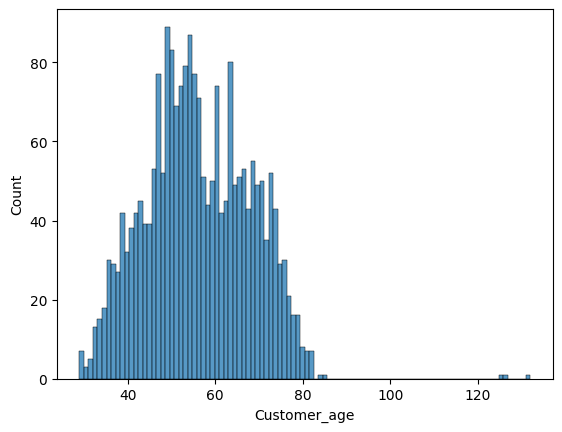

In [ ]:
sns.histplot(df['Customer_age'],bins=100, edgecolor = 'black')
plt.show()

We can see certain ouliers, where customers age exceeds 120

In [ ]:
#handling outliers using Quantile

Q1 = df['Customer_age'].quantile(0.25)
Q3 = df['Customer_age'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Customer_age']<(Q1 - 1.5 * IQR)) | (df['Customer_age'] > (Q3 + 1.5 * IQR))]
outliers

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_age
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,2,1,1,0,2,4,0,0,132
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,64,224,1,4,6,4,1,0,0,126
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,4,25,1,2,1,2,5,0,1,125


Checking the distribution of Marital Status

In [ ]:
df_marital = df['Marital_Status'].value_counts().reset_index()
df_marital

,Marital_Status,count
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77
5,Alone,3
6,Absurd,2
7,YOLO,2


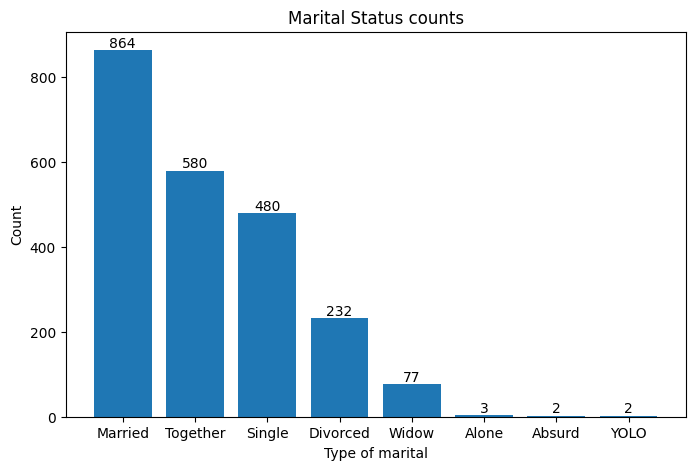

In [ ]:
plt.figure(figsize=(8,5))
bars = plt.bar(df_marital['Marital_Status'],df_marital['count'])
plt.title("Marital Status counts")
plt.xlabel('Type of marital')
plt.ylabel('Count')
plt.bar_label(bars, fmt='%d')
plt.show()

Highest number of customer are Married

In [ ]:
df_education = df['Education'].value_counts().reset_index()
df_education

,Education,count
0,Graduation,1127
1,PhD,486
2,Master,370
3,2n Cycle,203
4,Basic,54


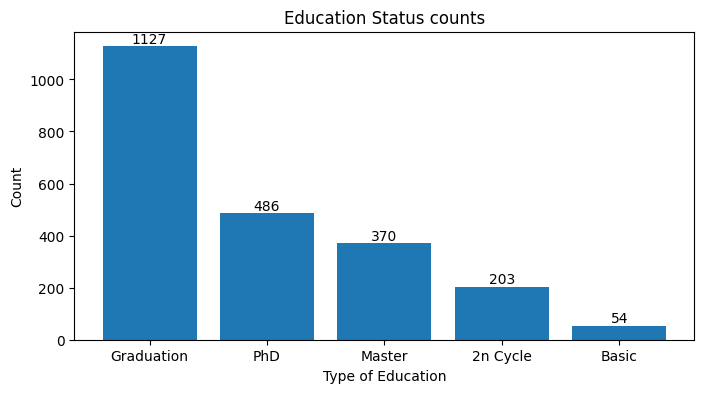

In [ ]:
plt.figure(figsize=(8,4))
bars = plt.bar(df_education['Education'],df_education['count'])
plt.title("Education Status counts")
plt.xlabel('Type of Education')
plt.ylabel('Count')
plt.bar_label(bars, fmt='%d')
plt.show()

Most of the customer are Graduates, followed by PHD and with Basic educated customer being the least

In [ ]:
df_kids = df['Kidhome'].value_counts().reset_index()
df_kids

,Kidhome,count
0,0,1293
1,1,899
2,2,48


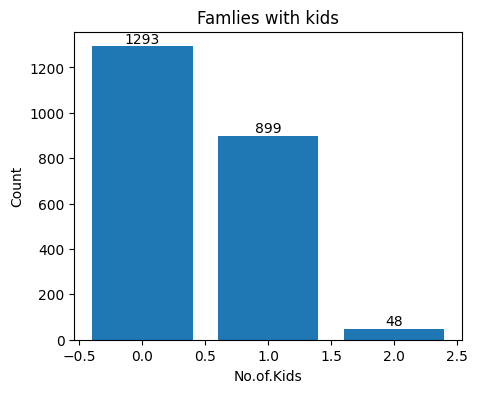

In [ ]:
plt.figure(figsize=(5,4))
bars = plt.bar(df_kids['Kidhome'],df_kids['count'])
plt.title("Famlies with kids")
plt.xlabel('No.of.Kids')
plt.ylabel('Count')
plt.bar_label(bars, fmt='%d')
plt.show()

From the chart we can see 1293 families has no kids, 899 families have one kid and 48 families has 2 kids

In [ ]:
df_teens = df['Teenhome'].value_counts().reset_index()
df_teens

,Teenhome,count
0,0,1158
1,1,1030
2,2,52


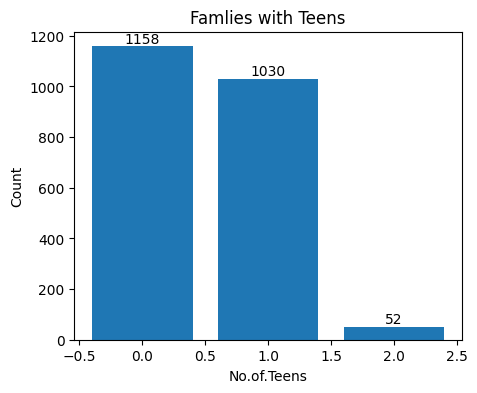

In [ ]:
plt.figure(figsize=(5,4))
bars = plt.bar(df_teens['Teenhome'],df_teens['count'])
plt.title("Famlies with Teens")
plt.xlabel('No.of.Teens')
plt.ylabel('Count')
plt.bar_label(bars, fmt='%d')
plt.show()

1158 families has no Teens, 1030 families wiht 1 Teenager and 52 families have 2 Teenagers

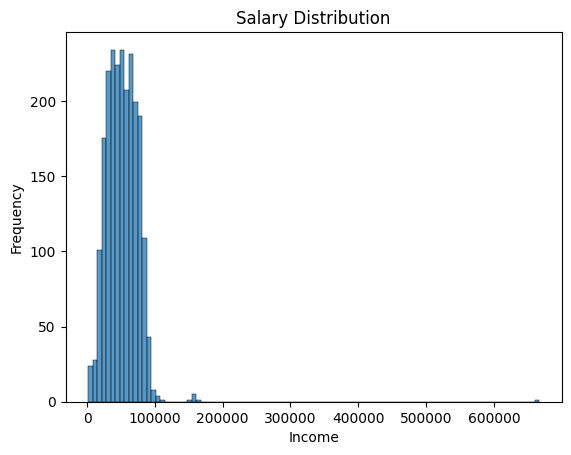

In [ ]:
sns.histplot(df['Income'], bins= 100,edgecolor = 'black')
plt.title('Salary Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Based on the observations from the chart there is a huge right skew, lets analise further using statistics

In [ ]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

IQR = Q3 - Q1

Outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]
Outliers.sort_values('Income')

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_age
1826,5555,1975,Graduation,Divorced,153924.0,0,0,NaT,81,1,...,1,1,0,0,0,0,0,0,0,50
1925,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,1,1,0,0,0,0,0,0,0,76
325,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,1,0,0,28,0,1,0,0,48
2204,8475,1973,PhD,Married,157243.0,0,1,NaT,98,20,...,2,1,15,0,22,0,0,0,0,52
853,5336,1971,Master,Together,157733.0,1,0,NaT,37,39,...,0,8,0,1,0,1,1,0,0,54
497,1501,1982,PhD,Married,160803.0,0,0,NaT,21,55,...,3,4,15,0,28,1,0,0,0,43
731,1503,1976,PhD,Together,162397.0,1,1,NaT,31,85,...,1,2,0,0,0,1,1,0,0,49
527,9432,1977,Graduation,Together,666666.0,1,0,NaT,23,9,...,1,12,4,3,1,3,6,0,0,48


In total we have 8 values outside the quartile range, However only the income of customer ID:  9432 seems to be incorrect

In [ ]:
df_complaint = df['Complain'].value_counts().reset_index()

We have 21 customer who have filed an complaint

Based on the Data at hand nothing is evident on why customers has filed a complaint


In [ ]:
df['Response'].value_counts()

,count
Response,
0,1906
1,334


In total 334 customer has responded to the last campaing

**Findings after Basic clean up and EDA**

 - There were 24 missing values in the Income Column, which were replaced with mean values

- Dt_customer(customer from date) column was in object format which was changed to Date type format

- There were no duplicate values in the dataset

**Findings from EDA:**

1. AGE has certail outliers, possibly as a result of incorrect Birth Year mentioning

2. EDA on marital status shows that Majority of the customer crow are either married or Together, followed by single

3. Majority of the customers are graduates which is followed by PHD and Masters

4. More than half of customers have no Kids, where one third of the customer have 1 kid and extremely few customer have 2 kids

5. Teenagers in the house is the same as kids, where majority of customers not having Teenagers at home

6. Salary distribution is Heavily right skewed

7. Off 2240 customer only 21 customers have made complaint

8. Finally out off 2240 customer 334 customers have responded to the recent campaing

**Statistical Findings**



In [ ]:
#creating a function to get mean, median, variance and standard deviation of key columns

def get_stats(column):
  lst = [column.mean(),column.median(),column.var(),column.std()]
  return lst

key_columns = ['Income','MntWines','MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Customer_age']
index = ['Mean','Median','Variance','Standard Deviation']
key_stats = {}

for column in key_columns:
  key_stats[column] = get_stats(df[column])

key_stats_df = pd.DataFrame(key_stats)
key_stats_df.index = index
key_stats_df

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_age
Mean,5.224725e+04,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,56.194196
Median,5.174150e+04,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,55.000000
Variance,6.268913e+08,113297.804709,1581.926033,50947.429388,2984.325391,1704.079555,2721.441683,3.733542,7.721252,8.544517,10.568729,5.888606,143.617921
Standard Deviation,2.503780e+04,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,11.984069


In [ ]:
#formatting the values for more clarity
for column in key_columns:
  key_stats_df[column] = key_stats_df[column].apply(lambda x : f'{x:.2f}')
key_stats_df

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_age
Mean,52247.25,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,56.19
Median,51741.50,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,55.00
Variance,626891287.05,113297.80,1581.93,50947.43,2984.33,1704.08,2721.44,3.73,7.72,8.54,10.57,5.89,143.62
Standard Deviation,25037.80,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,11.98


**Key_statistical Findings :**

-  The average income of the customers is 52,247.25
-  Customers spend the most on Wines, on averge $303.94
-  The least amount of spending were made on Cataloge
-  Average age of customers is 56


# Descriptive Statistics


**Handling Outliers**

Seems that customer's birth year was updated mistakenly, we will be replacing those with median value


In [ ]:
#Calculating Outlier in Year_birth use statistice and replacing them with median values

year_birth_Q1 = df['Year_Birth'].quantile(0.25)
year_birth_Q3 = df['Year_Birth'].quantile(0.75)
birth_IQR = year_birth_Q3 - year_birth_Q1

outliers_birth_year = df[(df['Year_Birth'] < (year_birth_Q1 - 1.5 *birth_IQR )) | (df['Year_Birth'] > (year_birth_Q3 + 1.5 *birth_IQR ))]
birth_year_median = df['Year_Birth'].median()

df.loc[df["Year_Birth"] < (year_birth_Q1 - 1.5 * birth_IQR),'Year_Birth'] = birth_year_median

outliers_birth_year = df[(df['Year_Birth'] < (year_birth_Q1 - 1.5 *birth_IQR )) | (df['Year_Birth'] > (year_birth_Q3 + 1.5 *birth_IQR ))]
outliers_birth_year

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_age


In [ ]:
df['Customer_age'] = datetime.now().year - df['Year_Birth']

Calculating measures of central tendency (mean, median, mode)

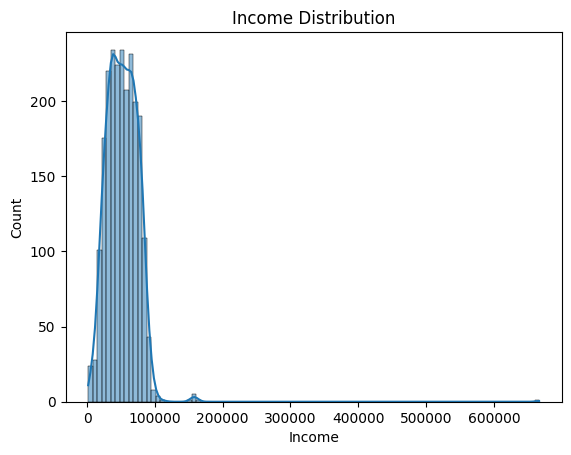

In [ ]:
sns.histplot(df['Income'],bins = 100, edgecolor = 'black', kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

The income distribution is heavily skewed to the right, we will check the outliers using quantile


In [ ]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

IQR = Q3 - Q1

Outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]
Outliers.sort_values('Income')

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_age
1826,5555,1975,Graduation,Divorced,153924.0,0,0,NaT,81,1,...,1,1,0,0,0,0,0,0,0,50
1925,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,1,1,0,0,0,0,0,0,0,76
325,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,1,0,0,28,0,1,0,0,48
2204,8475,1973,PhD,Married,157243.0,0,1,NaT,98,20,...,2,1,15,0,22,0,0,0,0,52
853,5336,1971,Master,Together,157733.0,1,0,NaT,37,39,...,0,8,0,1,0,1,1,0,0,54
497,1501,1982,PhD,Married,160803.0,0,0,NaT,21,55,...,3,4,15,0,28,1,0,0,0,43
731,1503,1976,PhD,Together,162397.0,1,1,NaT,31,85,...,1,2,0,0,0,1,1,0,0,49
527,9432,1977,Graduation,Together,666666.0,1,0,NaT,23,9,...,1,12,4,3,1,3,6,0,0,48


Only the income value of ID 9432 seems to be obnormal, we will replace is with mean value

In [ ]:
mean_income_without_outlier = df[df['Income'] != 666666.0]['Income'].mean()
mean_income_without_outlier

51972.83476216658

In [ ]:
#replacing the outlier with mean_value
df.loc[527,'Income'] = mean_income_without_outlier

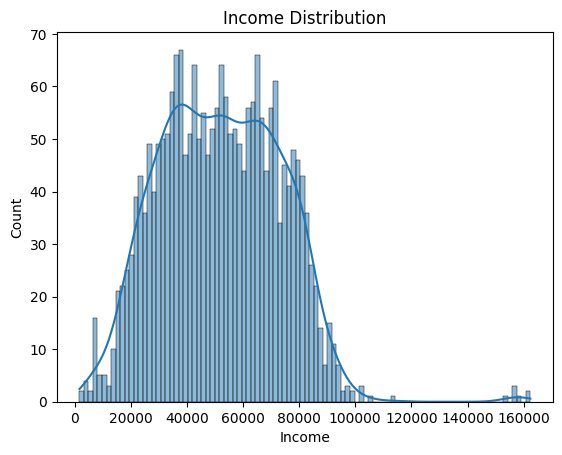

In [ ]:
#Checking the income distribution after outlier handling
sns.histplot(df['Income'],bins = 100, edgecolor = 'black', kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

The income distribution is still skewed to the right, but the remaining outliers values seems genuine, hence we will not be substituting them

In [ ]:
#Calculating mean
mean_age = int(df['Customer_age'].mean().round())
mean_income = df['Income'].mean()
print(f'Average age of customers is : {mean_age} \nAverage Income of Customers is : {mean_income.round(2)}')

Average age of customers is : 56 
Average Income of Customers is : 52247.25


In [ ]:
#Median
median_age = df['Customer_age'].median()
median_income = df['Income'].median()
print(f'Medina age of customers is : {median_age} \nMedian Income of Customers is : {median_income}')

Medina age of customers is : 55.0 
Median Income of Customers is : 51741.5


In [ ]:
#Mode
mode_age = df['Customer_age'].mode()[0]
mode_income = df['Income'].mode()[0]
mode_education = df['Education'].mode()[0]
mode_marital = df['Marital_Status'].mode()[0]

print(f"Most of the customers are of age : {mode_age} \nMost of the customer are earning: {mode_income} \nMost of the customer's education status is: {mode_education} \nMost of the customers are: {mode_marital}")

Most of the customers are of age : 49 
Most of the customer are earning: 52247.25135379061 
Most of the customer's education status is: Graduation 
Most of the customers are: Married


Calculation measures of dispersion

In [ ]:
sd_age = round(df['Customer_age'].std(),2)
sd_income = round(df['Income'].std(),2)
print(f'Standard Deviation of Age is {sd_age} \nStandard Deviation of Income is {sd_income}')

Standard Deviation of Age is 11.69 
Standard Deviation of Income is 25037.8


In [ ]:
var_age = round(df['Customer_age'].var(),2)
var_income = round(df['Income'].var(),2)
print(f'Variance of age is {var_age} \nVariance of Income is {var_income}')

Variance of age is 136.75 
Variance of Income is 626891287.05


Summarizing all the findings

In [ ]:
stats_dict = {
    'Mean': [mean_age, mean_income, None, None],
    'Median': [median_age, median_income, None, None],
    'Mode': [mode_age, mode_income, mode_education, mode_marital],
    'Std_Dev': [sd_age, sd_income, None, None],
    'Variance': [var_age, var_income, None, None]
}

stats_df = pd.DataFrame(stats_dict, index=['Customer_age', 'Income', 'Education', 'Marital_Status'])

stats_df = stats_df.fillna('N/A')
stats_df

,Mean,Median,Mode,Std_Dev,Variance
Customer_age,56.0,55.0,49,11.69,136.75
Income,52247.251354,51741.5,52247.251354,25037.8,626891287.05
Education,N/A,N/A,Graduation,N/A,N/A
Marital_Status,N/A,N/A,Married,N/A,N/A


# Probability Distributions

In [ ]:
#Binomial_distribution
#Response and Complaint

n_trails = len(df)
p_response = df['Response'].mean()
p_complaint = df['Complain'].mean()

response_expected_value = n_trails * p_response
complaint_expected_value = n_trails * p_complaint

print(f'Expected response is {response_expected_value}\nExpected complaint is {complaint_expected_value}')

Expected response is 334.0
Expected complaint is 21.0


In [ ]:
import scipy.stats as stats

probability_response = stats.binom.pmf(300,n_trails, p_response)
probability_complaint = stats.binom.pmf(100,n_trails, p_complaint)

print(f'Probablity of 300 response is {probability_response:.4f}\nProbability of 100 complaint is {probability_complaint}')

Probablity of 300 response is 0.0030
Probability of 100 complaint is 3.3384571405030274e-36


In [ ]:
cumulative_prob_response = stats.binom.cdf(300, n_trails, p_response)
cumulative_prob_complaint = stats.binom.cdf(100, n_trails, p_complaint)

print(f'Cumulative Probablity of 100 response is {cumulative_prob_response:.4f}\nCumulative Probability of 100 complaint is {cumulative_prob_complaint}')

Cumulative Probablity of 100 response is 0.0223
Cumulative Probability of 100 complaint is 1.0


In [ ]:
#Normal Distribution
#Income and Age
mean_income = df['Income'].mean()
std_income = df['Income'].std()

mean_age = df['Customer_age'].mean()
std_age = df['Customer_age'].std()

probability_income = stats.norm.cdf(40000,mean_income,std_income) #probablility of income less that 40,000
probability_age = stats.norm.cdf(30,mean_age,std_age)

print(f'Probability of Income less that 40000 is {probability_income:.2f} \nProbability of age less that 30 is {probability_age:.3f}')

Probability of Income less that 40000 is 0.29 
Probability of age less that 30 is 0.013


# Insights and Customer Segmentation

                    Income  MntWines  MntFruits  MntMeatProducts  \
Income            1.000000  0.685892   0.505461         0.684303   
MntWines          0.685892  1.000000   0.389637         0.562667   
MntFruits         0.505461  0.389637   1.000000         0.543105   
MntMeatProducts   0.684303  0.562667   0.543105         1.000000   
MntFishProducts   0.518659  0.399753   0.594804         0.568402   
MntSweetProducts  0.518264  0.386581   0.567164         0.523846   
MntGoldProds      0.384481  0.387516   0.392995         0.350609   

                  MntFishProducts  MntSweetProducts  MntGoldProds  
Income                   0.518659          0.518264      0.384481  
MntWines                 0.399753          0.386581      0.387516  
MntFruits                0.594804          0.567164      0.392995  
MntMeatProducts          0.568402          0.523846      0.350609  
MntFishProducts          1.000000          0.579870      0.422875  
MntSweetProducts         0.579870          1.00

Text(0.5, 1.0, 'Correlation of Income and Spendings')

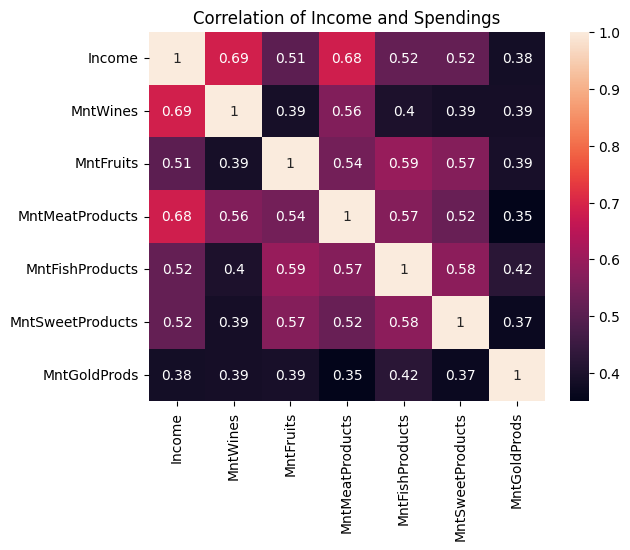

In [ ]:
#Checking the correlation between Income and Total Spendings

correlation_income_spending = df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr()
print(correlation_income_spending)

sns.heatmap(correlation_income_spending, annot= True)
plt.title('Correlation of Income and Spendings')

In [ ]:
#Spending based on Demographics

spendings_education = df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts',
                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

spending_marital = df.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

print(spendings_education)
print(spending_marital)

              MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Education                                                             
2n Cycle    198.182266  28.955665       141.256158        47.482759   
Basic         7.240741  11.111111        11.444444        17.055556   
Graduation  284.268855  30.774623       179.488909        43.149956   
Master      333.075676  21.654054       163.378378        32.100000   
PhD         404.495885  20.049383       168.602881        26.728395   

            MntSweetProducts  MntGoldProds  
Education                                   
2n Cycle           34.251232     46.399015  
Basic              12.111111     22.833333  
Graduation         31.367347     50.849157  
Master             21.175676     40.397297  
PhD                20.222222     32.310700  
                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Marital_Status                                                            
Absurd          355.500000  84.500000

<ipython-input-118-643fff19d7f8>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spendings_education = df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts',
<ipython-input-118-643fff19d7f8>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_marital = df.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts',


<Axes: title={'center': 'Spending based on Marital Status'}, xlabel='Marital_Status'>

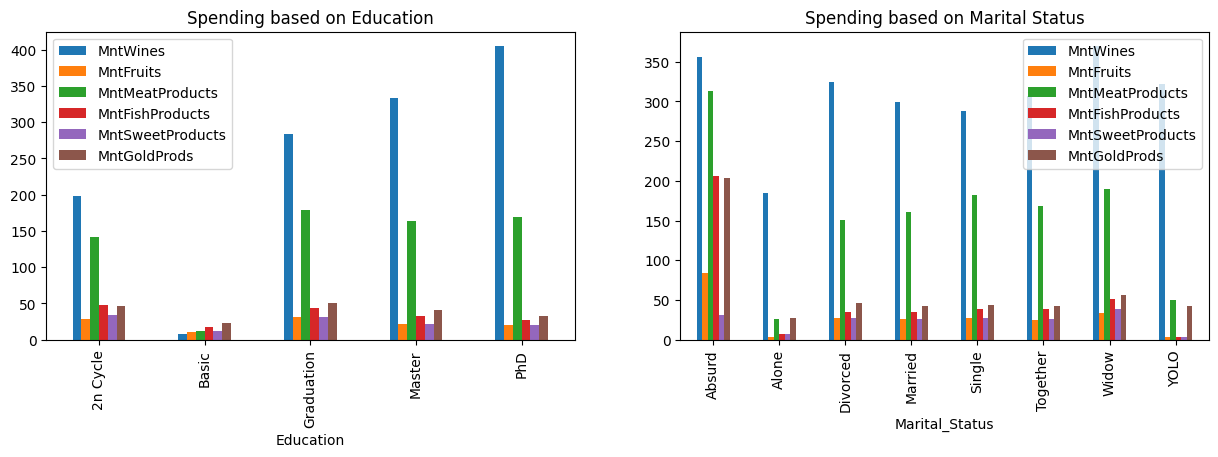

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,4))
spendings_education.plot(kind='bar', ax=axes[0], title='Spending based on Education')
spending_marital.plot(kind='bar',ax=axes[1], title='Spending based on Marital Status')


In [ ]:
#Customer's who complain vs who doesn't

df.groupby(df['Complain']==1)['Total_spending'].mean()


,Total_spending
Complain,
False,607.968905
True,376.428571


Customer who complain spend less amount, this may be due to custome dissatisfaction

In [ ]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Customer_age', 'Total_spending'],
      dtype='object')

In [ ]:
#Customer segmentation

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

features = ['Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Customer_age', 'Total_spending']

cat_variables = ['Education','Marital_Status']
num_variables = [col for col in features if col not in cat_variables]

encoder = OneHotEncoder(drop = 'first', sparse_output= False)
encoded_cat = encoder.fit_transform(df[cat_variables])

encoded_cat_names = []
for i, col in enumerate(cat_variables):
    categories = df[col].unique()
    for j, cat in enumerate(categories[1:]):
         encoded_cat_names.append(f'{col}_{cat}')

encoded_cat_df = pd.DataFrame(encoded_cat, columns = encoded_cat_names)

final_df = pd.concat([df[num_variables].reset_index(drop=True),encoded_cat_df.reset_index(drop=True)], axis = 1)


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(final_df)

inertia = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=2)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)


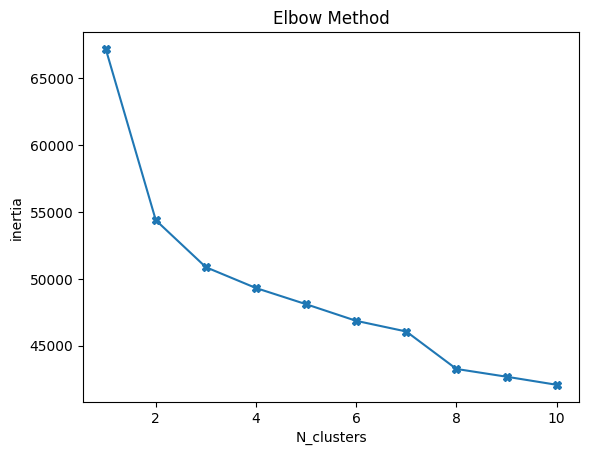

In [ ]:
plt.plot(range(1,11), inertia, marker = 'X')
plt.title('Elbow Method')
plt.xlabel('N_clusters')
plt.ylabel('inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=4)
df['cluster'] = kmeans.fit_predict(X)
cluster_center = scaler.inverse_transform(kmeans.cluster_centers_)


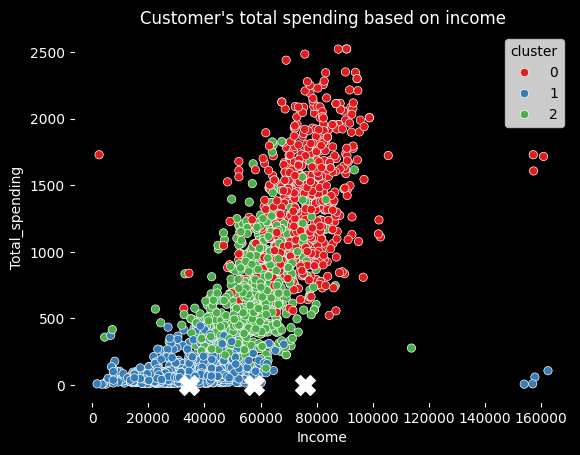

In [ ]:
ax = sns.scatterplot(data=df, x='Income', y='Total_spending', hue= 'cluster', palette='Set1')
ax.scatter(cluster_center[:,0], cluster_center[0:,1], s=200, marker='X',c='White')

ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='both', colors='white')

for text in ax.get_legend().get_texts():
    text.set_color("Black")

plt.title("Customer's total spending based on income")
plt.show()

In [ ]:
#taking mean of numerical values and grouping by cluster

numerical_values = ['Income', 'Kidhome',
       'Teenhome','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Customer_age', 'Total_spending']

df.groupby('cluster')[numerical_values].mean()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_age,Total_spending
cluster,,,,,,,,,,,,,,,,,,,
0,75790.297366,0.047782,0.179181,49.793515,612.001706,69.517065,459.542662,100.163823,71.177474,78.713311,1.353242,5.252560,6.018771,8.344710,2.909556,0.288396,0.006826,56.361775,1391.116041
1,34556.104451,0.812067,0.432245,49.206726,38.584570,4.845697,22.380811,6.948566,4.905045,15.284866,2.044510,2.070227,0.522255,3.149357,6.508408,0.093966,0.012859,52.967359,92.949555
2,57651.343718,0.227061,0.920684,48.332815,440.395023,20.654743,127.603421,28.516330,21.698289,57.589425,3.651633,6.188180,2.967341,7.614308,5.636081,0.108865,0.006221,60.776050,696.457232


# Conclusion and Recommendations

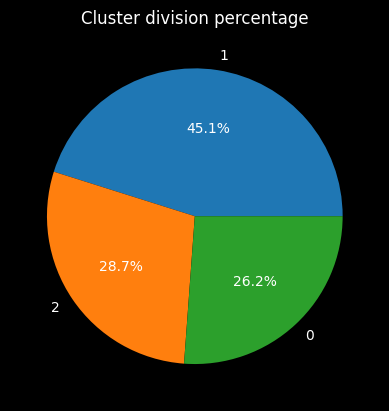

In [ ]:
fig, ax = plt.subplots()

# Plot the pie chart
wedges, texts, autotexts = ax.pie(cluster_count, labels=cluster_count.index, autopct='%1.1f%%')

fig.patch.set_facecolor('black')
ax.patch.set_facecolor('black')

# Set text colors to white
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('white')

# Set the title with white color
plt.title('Cluster division percentage', color='white')
plt.show()

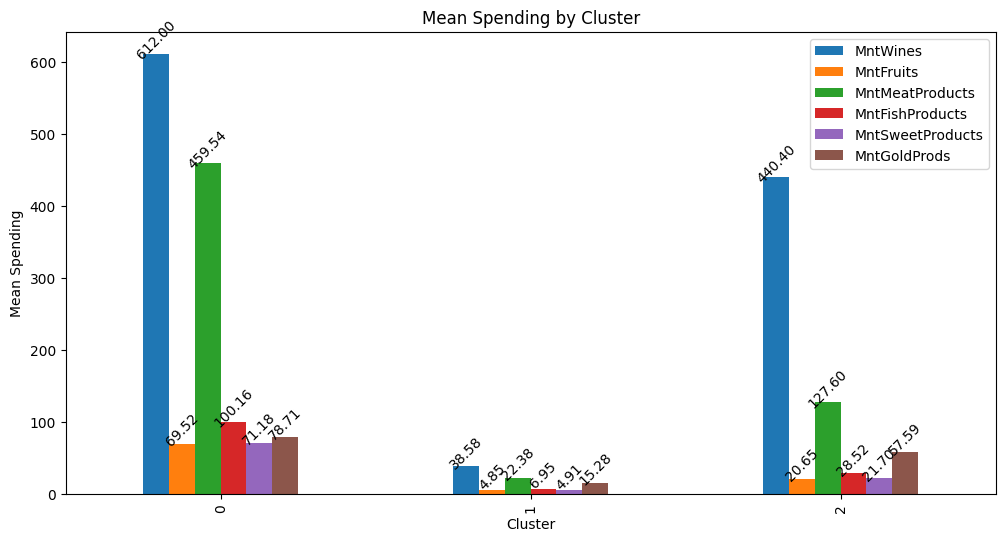

In [ ]:
#Average spending on each category by each cluster

spending_columns = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
spending_df = df.groupby('cluster')[spending_columns].mean()

ax = spending_df.plot(kind='bar', figsize=(12, 6))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                rotation=45)

plt.title('Mean Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Spending')
plt.show()

Text(0, 0.5, 'Count')

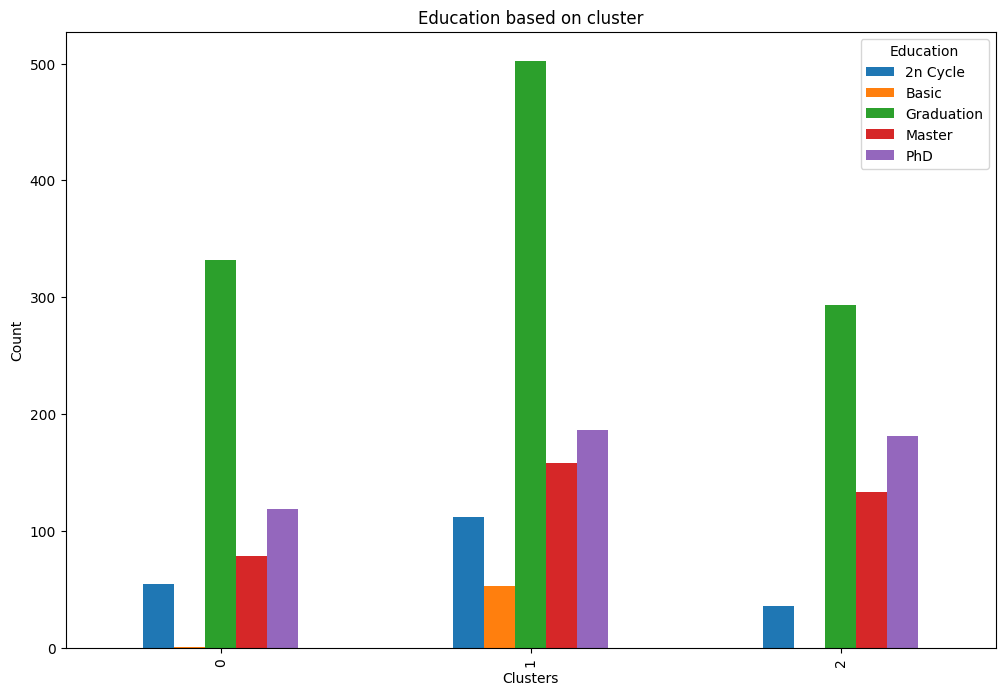

In [ ]:
education_cluster = df.groupby('cluster')['Education'].value_counts().unstack()
education_cluster.plot(kind='bar', figsize = (12,8))
plt.title('Education based on cluster')
plt.xlabel('Clusters')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

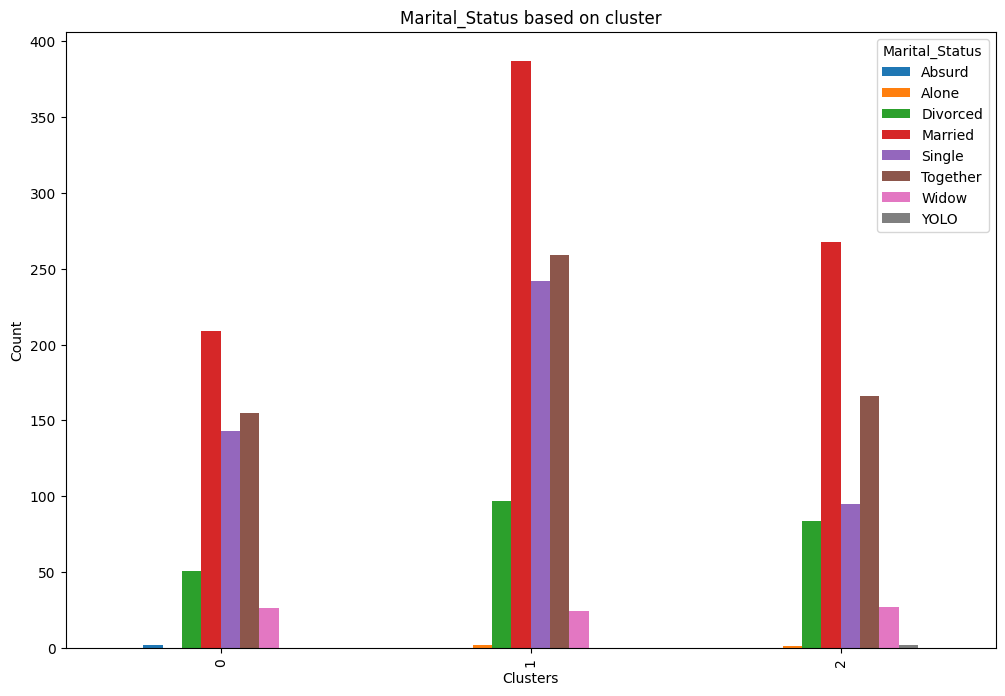

In [ ]:
education_cluster = df.groupby('cluster')['Marital_Status'].value_counts().unstack()
education_cluster.plot(kind='bar', figsize = (12,8))
plt.title('Marital_Status based on cluster')
plt.xlabel('Clusters')
plt.ylabel('Count')

# Bonus Task - Geogebra Experiment

This experiment lets you simulate coin flips as per your preferences and specifications!

Video Link : https://drive.google.com/file/d/1GVoZHRTC0ejUGTrFbpo4rFc0li3VdyR7/view?usp=sharing